In [1]:
import logging
import numpy as np
import pandas as pd
from arch import arch_model
from random import gauss
from random import seed
from matplotlib import pyplot as plt
import scipy.stats as sts

In [2]:
from rules_related import combine_rules_outputs
from whole_algorithm import train_model
from auxiliary import calc_log_returns

# Testing GARCH

## #1 increasing dispersion, increments are normal

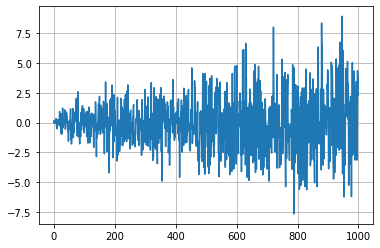

In [3]:
# create dataset
variance = np.arange(0, 10, .01)
# data = [gauss(0, var) for var in variance]
data = [sts.norm(0, var ** .5).rvs(1) for var in variance]

# plot
plt.plot(data)

plt.grid()
plt.show()

In [4]:
n_test = 100

train, test = data[:-n_test], data[-n_test:]

In [5]:
p = 1
q = 1

In [6]:
model = arch_model(train, mean='Zero', vol='GARCH', p=p, q=q, dist='normal')

In [7]:
fitted = model.fit()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 11233.507755790575
Iteration:      2,   Func. Count:     10,   Neg. LLF: 11054.43239588763
Iteration:      3,   Func. Count:     15,   Neg. LLF: 1790.1321557866208
Iteration:      4,   Func. Count:     19,   Neg. LLF: 11233.65079980968
Iteration:      5,   Func. Count:     24,   Neg. LLF: 22645.038818534493
Iteration:      6,   Func. Count:     31,   Neg. LLF: 11233.65079980968
Iteration:      7,   Func. Count:     36,   Neg. LLF: 1788.6406341309744
Iteration:      8,   Func. Count:     41,   Neg. LLF: 1783.5408944476849
Iteration:      9,   Func. Count:     45,   Neg. LLF: 1797.9672047372694
Iteration:     10,   Func. Count:     50,   Neg. LLF: 11233.65079980968
Iteration:     11,   Func. Count:     56,   Neg. LLF: 5115.598281421482
Iteration:     12,   Func. Count:     67,   Neg. LLF: 1784.0223377364837
Iteration:     13,   Func. Count:     72,   Neg. LLF: 1784.0076772207494
Iteration:     14,   Func. Count:     76,   Neg. LLF: 17

In [8]:
fitted.summary

<bound method ARCHModelResult.summary of                        Zero Mean - GARCH Model Results                        
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.001
Vol Model:                      GARCH   Log-Likelihood:               -1784.00
Distribution:                  Normal   AIC:                           3574.00
Method:            Maximum Likelihood   BIC:                           3588.41
                                        No. Observations:                  900
Date:                Sat, Oct 16 2021   Df Residuals:                      900
Time:                        16:40:40   Df Model:                            0
                               Volatility Model                              
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      8.4

In [9]:
fitted.params

omega       0.008478
alpha[1]    0.000000
beta[1]     1.000000
Name: params, dtype: float64

In [10]:
forecast = fitted.forecast(reindex=False, horizon=n_test)

In [11]:
forecast.residual_variance.values[0]

array([7.80458882, 7.81306672, 7.82154463, 7.83002254, 7.83850044,
       7.84697835, 7.85545625, 7.86393416, 7.87241207, 7.88088997,
       7.88936788, 7.89784579, 7.90632369, 7.9148016 , 7.92327951,
       7.93175741, 7.94023532, 7.94871323, 7.95719113, 7.96566904,
       7.97414695, 7.98262485, 7.99110276, 7.99958066, 8.00805857,
       8.01653648, 8.02501438, 8.03349229, 8.0419702 , 8.0504481 ,
       8.05892601, 8.06740392, 8.07588182, 8.08435973, 8.09283764,
       8.10131554, 8.10979345, 8.11827136, 8.12674926, 8.13522717,
       8.14370507, 8.15218298, 8.16066089, 8.16913879, 8.1776167 ,
       8.18609461, 8.19457251, 8.20305042, 8.21152833, 8.22000623,
       8.22848414, 8.23696205, 8.24543995, 8.25391786, 8.26239577,
       8.27087367, 8.27935158, 8.28782948, 8.29630739, 8.3047853 ,
       8.3132632 , 8.32174111, 8.33021902, 8.33869692, 8.34717483,
       8.35565274, 8.36413064, 8.37260855, 8.38108646, 8.38956436,
       8.39804227, 8.40652017, 8.41499808, 8.42347599, 8.43195

In [12]:
forecast.variance.values[0]

array([7.80458882, 7.81306672, 7.82154463, 7.83002254, 7.83850044,
       7.84697835, 7.85545625, 7.86393416, 7.87241207, 7.88088997,
       7.88936788, 7.89784579, 7.90632369, 7.9148016 , 7.92327951,
       7.93175741, 7.94023532, 7.94871323, 7.95719113, 7.96566904,
       7.97414695, 7.98262485, 7.99110276, 7.99958066, 8.00805857,
       8.01653648, 8.02501438, 8.03349229, 8.0419702 , 8.0504481 ,
       8.05892601, 8.06740392, 8.07588182, 8.08435973, 8.09283764,
       8.10131554, 8.10979345, 8.11827136, 8.12674926, 8.13522717,
       8.14370507, 8.15218298, 8.16066089, 8.16913879, 8.1776167 ,
       8.18609461, 8.19457251, 8.20305042, 8.21152833, 8.22000623,
       8.22848414, 8.23696205, 8.24543995, 8.25391786, 8.26239577,
       8.27087367, 8.27935158, 8.28782948, 8.29630739, 8.3047853 ,
       8.3132632 , 8.32174111, 8.33021902, 8.33869692, 8.34717483,
       8.35565274, 8.36413064, 8.37260855, 8.38108646, 8.38956436,
       8.39804227, 8.40652017, 8.41499808, 8.42347599, 8.43195

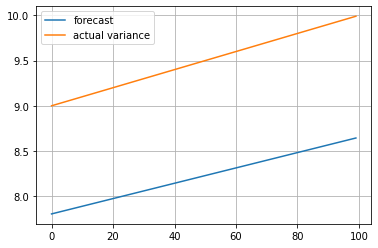

In [13]:
plt.plot(_, label='forecast')
plt.plot(variance[-n_test:], label='actual variance')

plt.legend()
plt.grid()
plt.show()

In [14]:
help(fitted.forecast)

Help on method forecast in module arch.univariate.base:

forecast(params: 'Optional[ArrayLike1D]' = None, horizon: 'int' = 1, start: 'Union[int, DateLike]' = None, align: "Literal['origin', 'target']" = 'origin', method: 'ForecastingMethod' = 'analytic', simulations: 'int' = 1000, rng: 'Optional[Callable[[Union[int, Tuple[int, ...]]], Float64Array]]' = None, random_state: 'Optional[np.random.RandomState]' = None, *, reindex: 'Optional[bool]' = None, x: 'Union[None, Dict[Label, ArrayLike], ArrayLike]' = None) -> 'ARCHModelForecast' method of arch.univariate.base.ARCHModelResult instance
    Construct forecasts from estimated model
    
    Parameters
    ----------
    params : ndarray, optional
        Alternative parameters to use.  If not provided, the parameters
        estimated when fitting the model are used.  Must be identical in
        shape to the parameters computed by fitting the model.
    horizon : int, optional
       Number of steps to forecast
    start : {int, datetim

## #2 white noise (Wiener process) 

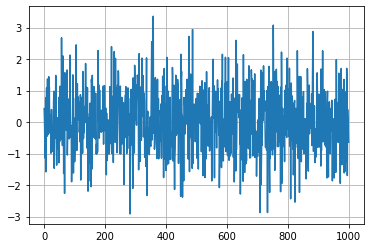

In [15]:
# create dataset
sample_size = 1000
mean = 0
variance = 1
# data = [sts.norm(0, var ** .5).rvs(1) for var in variance]
data = sts.norm(mean, variance ** .5).rvs(sample_size)

# plot
plt.plot(data)

plt.grid()
plt.show()

In [16]:
n_test = int(sample_size / 10)

train, test = data[:-n_test], data[-n_test:]

In [17]:
p = 1
q = 1

In [18]:
model = arch_model(train, mean='Zero', vol='GARCH', p=p, q=q, dist='normal')

In [19]:
fitted = model.fit()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 4463.381254818678
Iteration:      2,   Func. Count:     14,   Neg. LLF: 1263.5728742168099
Iteration:      3,   Func. Count:     23,   Neg. LLF: 1261.3307926057523
Iteration:      4,   Func. Count:     27,   Neg. LLF: 1274.0541709688189
Iteration:      5,   Func. Count:     32,   Neg. LLF: 1264.2529331425376
Iteration:      6,   Func. Count:     37,   Neg. LLF: 1261.2813388404943
Iteration:      7,   Func. Count:     42,   Neg. LLF: 1261.2681159057543
Iteration:      8,   Func. Count:     46,   Neg. LLF: 1261.2680298056107
Iteration:      9,   Func. Count:     49,   Neg. LLF: 1261.2680298062162
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1261.2680298056107
            Iterations: 9
            Function evaluations: 49
            Gradient evaluations: 9


In [20]:
fitted.summary

<bound method ARCHModelResult.summary of                        Zero Mean - GARCH Model Results                        
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.001
Vol Model:                      GARCH   Log-Likelihood:               -1261.27
Distribution:                  Normal   AIC:                           2528.54
Method:            Maximum Likelihood   BIC:                           2542.94
                                        No. Observations:                  900
Date:                Sat, Oct 16 2021   Df Residuals:                      900
Time:                        16:40:41   Df Model:                            0
                               Volatility Model                              
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega         

In [21]:
fitted.params

omega       1.082148e-02
alpha[1]    6.976777e-13
beta[1]     9.893417e-01
Name: params, dtype: float64

In [22]:
forecast = fitted.forecast(reindex=False, horizon=n_test)

In [23]:
forecast_variance = forecast.variance.values[0]

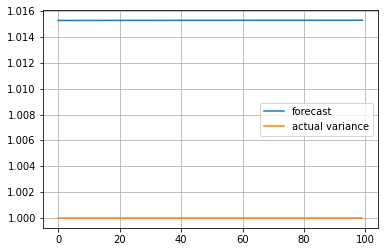

In [24]:
plt.plot(forecast_variance, label='forecast')
plt.plot([variance] * n_test, label='actual variance')

plt.legend()
plt.grid()
plt.show()

# Reading files

In [25]:
rtsi = pd.read_csv('files/RI.RTSI_790101_211016.csv', sep=',')

In [26]:
(rtsi['<TICKER>'] != 'RI.RTSI').any()

False

In [27]:
(rtsi['<TIME>'] != '00:00:00').any()

False

In [28]:
rtsi.drop(columns=['<PER>', '<TIME>', '<TICKER>'], inplace=True)

In [29]:
rtsi['<DATE>'] = pd.to_datetime(rtsi['<DATE>'], format='%Y%m%d')

In [30]:
rtsi.set_index('<DATE>', inplace=True)

In [31]:
rtsi['return'] = rtsi['<CLOSE>'].pct_change(1)

In [32]:
rtsi['log return'] = calc_log_returns(rtsi['<CLOSE>'])  # rtsi['<CLOSE>'].rolling(2).apply(lambda values: np.log(values[1] / values[0])).copy()

In [33]:
rtsi = rtsi.iloc[1:].copy()

In [34]:
rtsi.isna().any()

<OPEN>        False
<HIGH>        False
<LOW>         False
<CLOSE>       False
<VOL>         False
return        False
log return    False
dtype: bool

In [35]:
rtsi

,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>,return,log return
<DATE>,,,,,,,
2001-02-18,180.10,180.10,180.10,180.10,0,0.000000,0.000000
2001-02-19,180.10,181.21,176.67,177.29,0,-0.015602,-0.015725
2001-02-20,177.29,179.90,175.28,176.45,0,-0.004738,-0.004749
2001-02-21,176.45,176.45,161.12,162.39,0,-0.079683,-0.083037
2001-02-22,162.39,168.35,162.39,168.31,0,0.036455,0.035807
...,...,...,...,...,...,...,...
2021-10-11,1871.73,1883.71,1867.58,1882.43,1769145502,0.011537,0.011471
2021-10-12,1867.15,1876.79,1860.64,1869.94,1386130631,-0.006635,-0.006657
2021-10-13,1869.05,1869.05,1835.80,1855.11,1830447018,-0.007931,-0.007962


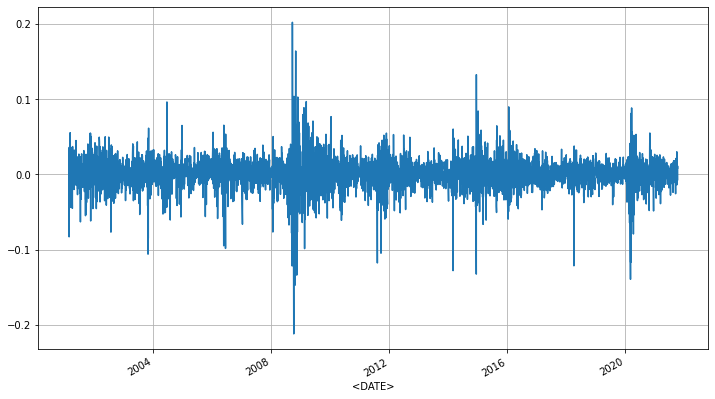

In [76]:
rtsi['log return'].plot(figsize=(12, 7))

plt.grid()
plt.show()

In [85]:
rtsi['log return'].describe()

count    5174.000000
mean        0.000455
std         0.020327
min        -0.211994
25%        -0.008822
50%         0.001318
75%         0.010414
max         0.202039
Name: log return, dtype: float64

# Testing `train`

In [36]:
logging.basicConfig(level=logging.DEBUG)

In [101]:
rescale_factor = 100

In [102]:
input_data = rtsi['log return'].copy() * rescale_factor
clusterization_method = 'gaussian'
local_method = 'garch'
local_method_parameters = {'p': 1, 'q': 1, 'mean': 'Zero', 'dist': 'normal'}

In [59]:
n = input_data.shape[0]

In [110]:
mu = 0
sigma = .02 * rescale_factor

centers = np.array([[mu] * n])
cov_matrices = np.array([np.diag([sigma] * n, k=0)])

In [150]:
slice_len = 350

sts.multivariate_normal(mean=np.longdouble(centers[0][:slice_len]),
                        cov=np.longdouble(cov_matrices[0][:slice_len, :slice_len])).pdf(np.longdouble(input_data[:slice_len])) * \
    ((2 * np.pi) ** (.5 * slice_len))

0.0

In [152]:
np.longdouble(cov_matrices[0][:slice_len, :slice_len])

array([[2., 0., 0., ..., 0., 0., 0.],
       [0., 2., 0., ..., 0., 0., 0.],
       [0., 0., 2., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 2., 0., 0.],
       [0., 0., 0., ..., 0., 2., 0.],
       [0., 0., 0., ..., 0., 0., 2.]], dtype=float128)

In [151]:
type(_)

numpy.float64

In [133]:
np.longdouble('1e-500')

1e-500

In [153]:
input_data.shape

(5174,)

In [157]:
np.exp(- input_data ** 2 / 2)

<DATE>
2001-02-18    1.000000e+00
2001-02-19    2.904140e-01
2001-02-20    8.933495e-01
2001-02-21    1.065355e-15
2001-02-22    1.644059e-03
                  ...     
2021-10-11    5.179272e-01
2021-10-12    8.012452e-01
2021-10-13    7.283343e-01
2021-10-14    5.351701e-01
2021-10-15    7.100193e-01
Name: log return, Length: 5174, dtype: float64

In [158]:
_.describe()

count    5.174000e+03
mean     5.536186e-01
std      3.610908e-01
min      2.574215e-98
25%      1.918810e-01
50%      6.234863e-01
75%      9.063595e-01
max      1.000000e+00
Name: log return, dtype: float64

In [159]:
0.55 ** input_data.shape[0]

0.0

In [160]:
input_data.shape[0] / 3

1724.6666666666667

In [168]:
np.longdouble('1e300') * 1e10

1e+310

In [169]:
1 / ((2 * np.pi) ** .5)

0.3989422804014327

In [175]:
np.longdouble('1e-1700') * np.longdouble('1e-2500')

1e-4200

In [176]:
mv_norm = sts.multivariate_normal(mean=centers[0], cov=cov_matrices[0])

In [188]:
mv_norm.pdf(np.longdouble(input_data))

0.0

In [195]:
np.longdouble(input_data[input_data != 0])

array([-1.57254423, -0.47492598, -8.30367006, ..., -0.79623513,
        1.11818655,  0.82760265], dtype=float128)

In [196]:
res = 1
for elem in _:
    res *= elem

In [197]:
res

-7.7803119280817773663e-454

In [192]:
_.prod()

-7.7803119280817773663e-454

In [107]:
clusterization_parameters = {'centers': centers, 'cov_matrices': cov_matrices, 'n_clusters': 1}

In [108]:
train_model(input_data,
            clusterization_method=clusterization_method,
            clusterization_parameters=clusterization_parameters,
            local_method=local_method,
            local_method_parameters=local_method_parameters)

DEBUG:train_model:Starting clusterization
DEBUG:cluster_input:clustering method is gaussian
DEBUG:cluster_input:parameters is not None
INFO:calc_gaussian_membership_degrees:Starting


KeyboardInterrupt: 

## Same data fed to GARCH(1, 1)

In [ ]:
model = arch_model(input_data, mean=local_method_parameters['mean'], vol='GARCH', p=p, q=q,
                   dist=local_method_parameters['dist'])

In [ ]:
fitted = model.fit()

In [ ]:
fitted.summary

In [68]:
fitted.params

omega       0.074493
alpha[1]    0.091296
beta[1]     0.889631
Name: params, dtype: float64

In [69]:
forecast = fitted.forecast(reindex=False, horizon=1)

In [70]:
forecast_variance = forecast.variance.values[0]

In [71]:
forecast_variance

array([1.90822256])